In [1]:
# Importing dependencies

import pandas as pd
import numpy as np
import random
import seaborn as sns
import time

from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [4]:
# Creating our dataset with the required factors

X, y = make_classification( n_samples=10000, n_features=10, n_informative=4,
                            n_redundant=2, n_repeated=0, n_classes=2,
                            flip_y=.1,
                            weights=[.7, .3],
                            class_sep=.2, 
                            random_state=329214 )

finalreport = pd.DataFrame()

In [5]:
# Creating column names for all of our features and our result column

contlist = []
for i in range(1, 11):
    contlist.append('cont'+str(i))
    
data = pd.concat([pd.DataFrame(X, columns = contlist), pd.DataFrame(y, columns = ['y'])],axis = 1)

data2 = data.drop(['y'], axis = 1)

In [6]:
# Cutting our data into categorical variables

data2["Cat1"] = pd.cut(data['cont2'], [-100, 0,100], labels = ["Low", "High"])
data2["Cat2"] = pd.cut(data['cont8'], [-100, 0, 100], labels = ["Low", "High"])
data2["Cat3"] = pd.cut(data['cont6'], [-100, 0, 100], labels = ["Low", "High"])
data2["Cat4"] = pd.cut(data['cont4'], [-100, -1, 1, 100], 
                             labels = ["Low", "Medium", "High"])
data2["Cat5"] = pd.cut(data['cont10'], [-100, -1, 1, 100], 
                             labels = ["Low", "Medium", "High"])

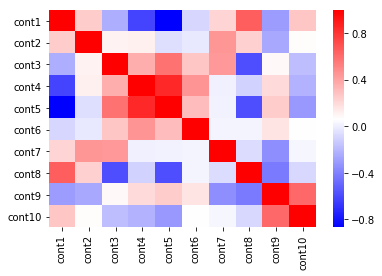

In [7]:
# correlation map

sns.heatmap(data2[0:11].corr(), cmap = ("bwr")) ;

In [8]:
varlist = list(data2)

numericcols = set(data2._get_numeric_data().columns)
catcols = [value for value in varlist if value not in numericcols] 

# The following is the final list of categorical variables to be used in Naive Bayes;
finallist  = [var for var in catcols]

In [20]:
# For Loop NB

print(time.ctime())

f1 = []

for i in range(1, 6) :
    if i == 1 :
        for j in range(1, 6) :
            # random sampling without replacement
            vars = random.sample(finallist, i)
            DF = data2.loc[:, vars]
            encode = preprocessing.OneHotEncoder()
            encode.fit(DF)
            onehotlabel = encode.transform(DF).toarray()
            clf = MultinomialNB()
            clf.fit(onehotlabel, y)
            y_pred = clf.predict(onehotlabel)
            f1.append(f1_score(y, y_pred))
            
        reportdf = pd.DataFrame([['NB', i, max(f1)]])
        f1 = []
        finalreport = finalreport.append(reportdf)
        
    elif (i == 2) | (i == 3) :
        for j in range (1, 11) :
            vars = random.sample(finallist, i)
            DF = data2.loc[:, vars]
            encode = preprocessing.OneHotEncoder()
            encode.fit(DF)
            onehotlabel = encode.transform(DF).toarray()
            clf = MultinomialNB()
            clf.fit(onehotlabel, y)
            y_pred = clf.predict(onehotlabel)
            f1.append(f1_score(y, y_pred))
            
        reportdf = pd.DataFrame([['NB', i, max(f1)]])
        f1 = []
        finalreport = finalreport.append(reportdf)
            
    elif i == 4 :
        for j in range (1, 6) :
            vars = random.sample(finallist, i)
            DF = data2.loc[:, vars]
            encode = preprocessing.OneHotEncoder()
            encode.fit(DF)
            onehotlabel = encode.transform(DF).toarray()
            clf = MultinomialNB()
            clf.fit(onehotlabel, y)
            y_pred = clf.predict(onehotlabel)
            f1.append(f1_score(y, y_pred))
            
        reportdf = pd.DataFrame([['NB', i, max(f1)]])
        f1 = []
        finalreport = finalreport.append(reportdf)
            
    else :
        for j in range(1) :
            vars = random.sample(finallist, i)
            DF = data2.loc[:, vars]
            encode = preprocessing.OneHotEncoder()
            encode.fit(DF)
            onehotlabel = encode.transform(DF).toarray()
            clf = MultinomialNB()
            clf.fit(onehotlabel, y)
            y_pred = clf.predict(onehotlabel)
            f1.append(f1_score(y, y_pred))
            
        reportdf = pd.DataFrame([['NB', i, max(f1)]])
        f1 = []
        finalreport = finalreport.append(reportdf)
    print(i, time.ctime())




Thu Sep 26 12:35:15 2019
1 Thu Sep 26 12:35:15 2019
2 Thu Sep 26 12:35:15 2019


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-sco

3 Thu Sep 26 12:35:15 2019
4 Thu Sep 26 12:35:15 2019
5 Thu Sep 26 12:35:15 2019


In [16]:
# For Loop KNN Categorical Only

print(time.ctime())

f1 = []

numericvars = [ num for num in list(data2) if 'cont' in num ]

for n in range(3, 10, 2):
    for i in range(3, 8):
        print("features = ", i, time.ctime())
        for k in range(0,100):
            vars = random.sample(numericvars, i)
            contdata = data2.loc[:, vars]
            
            scaler = StandardScaler()  
            scaler.fit(contdata)
            final_scaled = scaler.transform(contdata)
            
            classifier = KNeighborsClassifier(n_neighbors=n, algorithm = 'kd_tree')  
            classifier.fit(final_scaled, y)
            y_pred = classifier.predict(final_scaled)
            
            f1.append(f1_score(y, y_pred))
            
        reportdf = pd.DataFrame([['cont', n, i, max(f1)]])
        f1 = []
        finalreport = finalreport.append(reportdf)
            
            
            

print(time.ctime())

Thu Sep 26 12:18:26 2019
features =  3 Thu Sep 26 12:18:26 2019
features =  4 Thu Sep 26 12:18:49 2019
features =  5 Thu Sep 26 12:19:13 2019
features =  6 Thu Sep 26 12:19:40 2019
features =  7 Thu Sep 26 12:20:12 2019
features =  3 Thu Sep 26 12:20:51 2019
features =  4 Thu Sep 26 12:21:14 2019
features =  5 Thu Sep 26 12:21:39 2019
features =  6 Thu Sep 26 12:22:09 2019
features =  7 Thu Sep 26 12:22:45 2019
features =  3 Thu Sep 26 12:23:29 2019
features =  4 Thu Sep 26 12:23:52 2019
features =  5 Thu Sep 26 12:24:18 2019
features =  6 Thu Sep 26 12:24:50 2019
features =  7 Thu Sep 26 12:25:28 2019
features =  3 Thu Sep 26 12:26:17 2019
features =  4 Thu Sep 26 12:26:40 2019
features =  5 Thu Sep 26 12:27:07 2019
features =  6 Thu Sep 26 12:27:40 2019
features =  7 Thu Sep 26 12:28:22 2019
Thu Sep 26 12:29:14 2019


In [25]:
# For Loop KNN Categorical and Continuous

print(time.ctime())

f1 = []

for n in range(3, 10, 2):
    for i in range(3, 8):
        print("features = ", i, time.ctime())
        for k in range(0, 100) :
            vars = random.sample(list(data2), 5)
            numericvars = [ num for num in vars if 'cont' in num ]
            catvars = [ value for value in vars if value not in numericvars ]
            
            catdata = data2.loc[:, catvars]
            contdata = data2.loc[:, numericvars]
            
            if catvars == [] :
                contdata = data2.loc[:, vars]
                scaler = StandardScaler()  
                scaler.fit(contdata)
                final_scaled = scaler.transform(contdata)
                
                classifier = KNeighborsClassifier(n_neighbors=n, algorithm = 'kd_tree')  
                classifier.fit(final_scaled, y)
                y_pred = classifier.predict(final_scaled)
                f1.append(f1_score(y, y_pred))
            
            else :
                encode = preprocessing.OneHotEncoder()
                encode.fit(catdata)
                onehotlabels = encode.transform(catdata).toarray()
                
                onehotdf = pd.DataFrame(onehotlabels)
                final = pd.concat([contdata, onehotdf], axis = 1)
                
                scaler = StandardScaler()  
                scaler.fit(final)
                final_scaled = scaler.transform(final)
                classifier = KNeighborsClassifier(n_neighbors=n, algorithm = 'kd_tree')  
                classifier.fit(final_scaled, y)
                y_pred = classifier.predict(final_scaled)
                
                f1.append(f1_score(y, y_pred))
            
        reportdf = pd.DataFrame([['contcat', n, i, max(f1)]])
        f1 = []
        finalreport = finalreport.append(reportdf)

print(time.ctime())

Thu Sep 26 12:41:38 2019
features =  3 Thu Sep 26 12:41:38 2019
features =  4 Thu Sep 26 12:42:05 2019
features =  5 Thu Sep 26 12:42:34 2019
features =  6 Thu Sep 26 12:43:03 2019
features =  7 Thu Sep 26 12:43:34 2019
features =  3 Thu Sep 26 12:44:02 2019
features =  4 Thu Sep 26 12:44:30 2019
features =  5 Thu Sep 26 12:44:58 2019
features =  6 Thu Sep 26 12:45:27 2019
features =  7 Thu Sep 26 12:45:55 2019
features =  3 Thu Sep 26 12:46:25 2019
features =  4 Thu Sep 26 12:46:54 2019
features =  5 Thu Sep 26 12:47:24 2019
features =  6 Thu Sep 26 12:47:54 2019
features =  7 Thu Sep 26 12:48:24 2019
features =  3 Thu Sep 26 12:48:55 2019
features =  4 Thu Sep 26 12:49:26 2019
features =  5 Thu Sep 26 12:49:57 2019
features =  6 Thu Sep 26 12:50:28 2019
features =  7 Thu Sep 26 12:50:59 2019
Thu Sep 26 12:51:30 2019


In [26]:
print(finalreport)

         0  1         2         3
0     cont  3  3.000000  0.759544
0     cont  3  4.000000  0.785904
0     cont  3  5.000000  0.786647
0     cont  3  6.000000  0.780940
0     cont  3  7.000000  0.766582
0     cont  5  3.000000  0.729511
0     cont  5  4.000000  0.744781
0     cont  3  3.000000  0.759544
0     cont  3  4.000000  0.792846
0     cont  3  5.000000  0.786047
0     cont  3  6.000000  0.780940
0     cont  3  7.000000  0.766902
0     cont  5  3.000000  0.729511
0     cont  5  4.000000  0.742750
0     cont  5  5.000000  0.741695
0     cont  5  6.000000  0.732255
0     cont  5  7.000000  0.714584
0     cont  7  3.000000  0.706698
0     cont  7  4.000000  0.727429
0     cont  7  5.000000  0.722441
0     cont  7  6.000000  0.711519
0     cont  7  7.000000  0.692568
0     cont  9  3.000000  0.683971
0     cont  9  4.000000  0.712820
0     cont  9  5.000000  0.703730
0     cont  9  6.000000  0.676879
0     cont  9  7.000000  0.677291
0       NB  1  0.000000       NaN
0       NB  2 

In [28]:
import os

os.chdir('/Users/calgergen/Desktop/')

finalreport.to_csv('CalGergenFinalReport.csv')